# <font face = 'Impact' color = '#FFAEBC' > Exploring Associations between Variables <font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> License: GPL v3.0<font/>
#### <font face = 'Times New Roman' color = '#B5E5CF'> Author and Trainer: Paolo Hilado MSc. (Data Science)<font/>
This notebook provides a comprehensive analysis of variable associations while ensuring key statistical assumptions are met. It begins with an exploratory data analysis, checking for normality, linearity, presence of outliers, and homoscedasticity using visualizations and statistical tests. After verifying assumptions, the notebook applies appropriate correlation techniques such as Pearson, Spearman, and Kendall’s Tau-b, ensuring robust insights into the relationships between variables.

In [3]:
# Import the necessary libraries pandas, numpy, scipy.stats, seaborn, matplotlib.pyplot, qdesc
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import qdesc as qd
from sklearn.preprocessing import MinMaxScaler


In [6]:
# Loading our data set RevGrades
df = pd.read_excel('RevGrades.xlsx')
df.head()


,Review,Grades
0,1.93,83.49
1,4.24,85.89
2,2.58,84.92
3,3.92,85.22
4,3.35,84.93


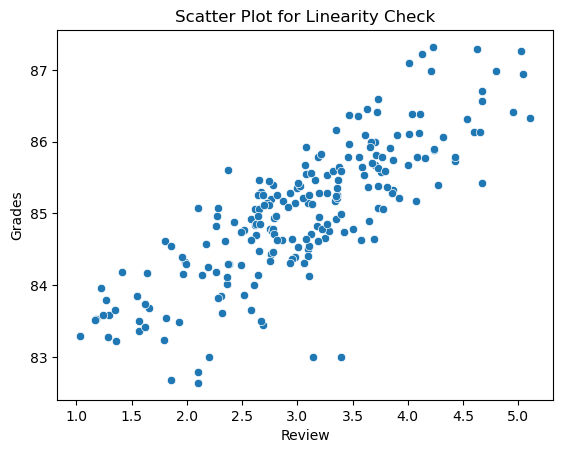

In [5]:
# Checking the linearity assumption of the variables using a scatter plot.
sns.scatterplot(x=df['Review'], y=df['Grades'])
plt.title('Scatter Plot for Linearity Check')
plt.show()



--- Variable: Review ---
  Anderson-Darling Statistic : 0.3394
  Critical Value (@ 5.0%) : 0.7730
  Decision : Fail to Reject Null


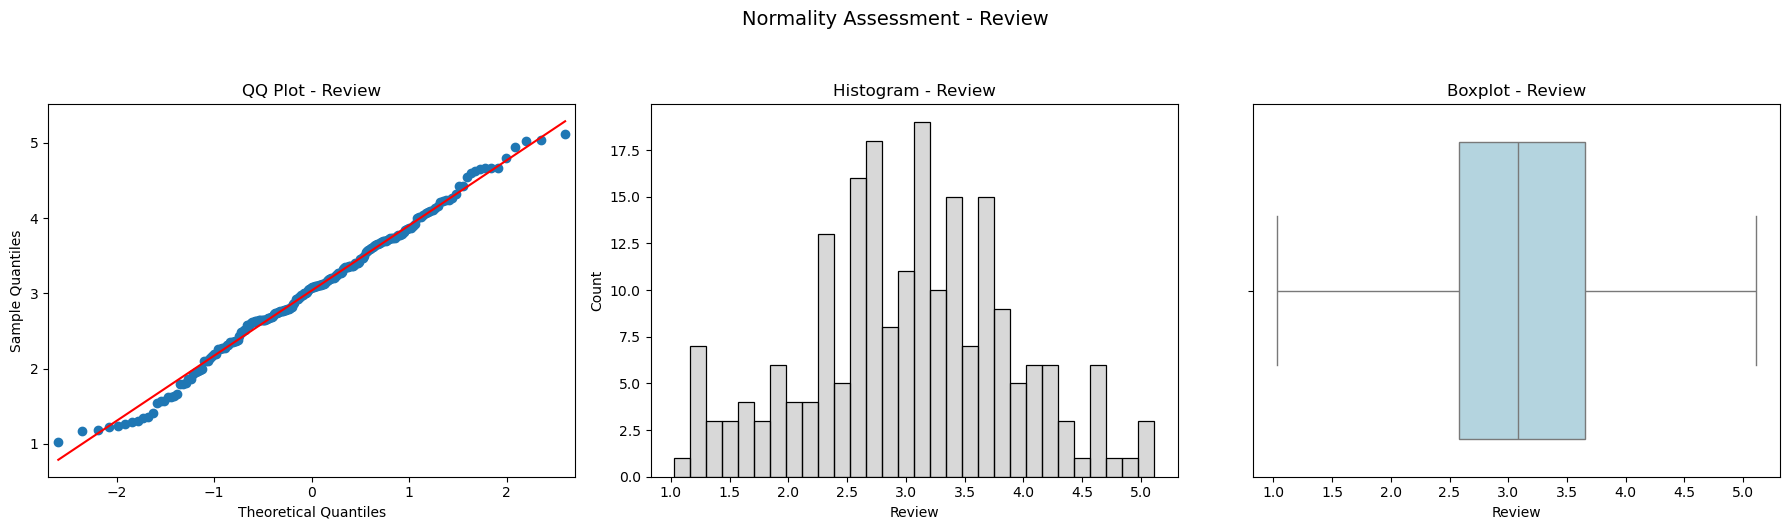


--- Variable: Grades ---
  Anderson-Darling Statistic : 0.3787
  Critical Value (@ 5.0%) : 0.7730
  Decision : Fail to Reject Null


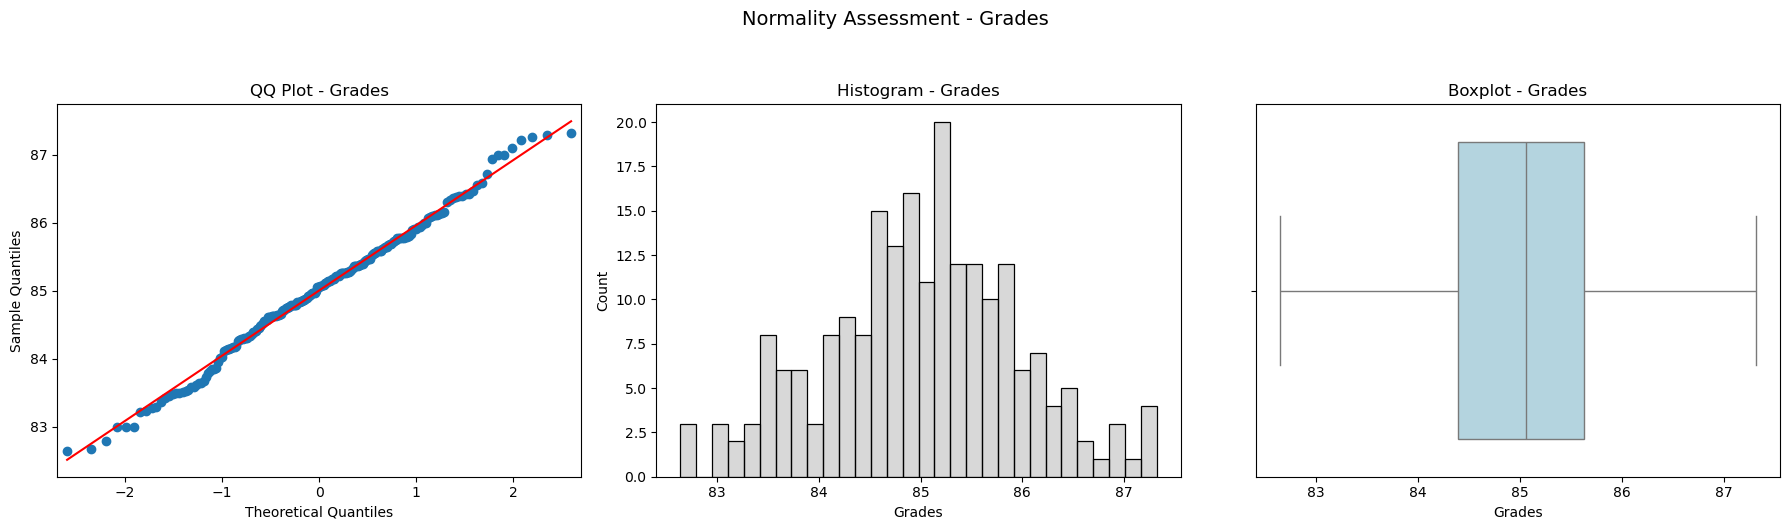

In [9]:
# Doing a normality check using histograms and AD-test
qd.normcheck_dashboard(df)


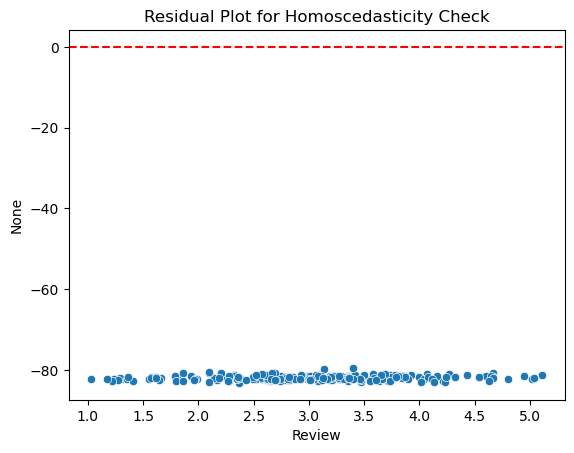

In [ ]:
# Doing a homoscedasticity check with residual plots (to fix)
residuals = df['Review'] - df['Grades']
sns.scatterplot(x=df['Review'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()


In [8]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(df[['Review', 'Grades']])
dfscaled = pd.DataFrame(data_normalized)

In [9]:
# Check the first two rows of the standardized data
dfscaled.head(2)

,0,1
0,0.220588,0.181624
1,0.786765,0.694444


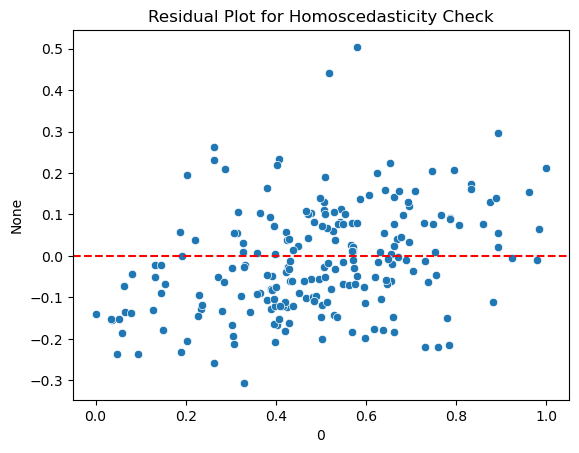

In [10]:
# Doing a homoscedasticity check with residual plots
residuals = dfscaled[0] - dfscaled[1]
sns.scatterplot(x=dfscaled[0], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Homoscedasticity Check')
plt.show()

In [16]:
# Standardize the variables to have a better visual of the homoscedasticity check.
df_standardized = (df['Review'] - df['Review'].mean()) / df['Review'].std()
df_standardized

0     -1.277960
1      1.386875
2     -0.528114
3      1.017721
4      0.360164
         ...   
208   -0.978021
209    0.360164
210   -0.135887
211   -0.401217
212    0.371700
Name: Review, Length: 213, dtype: float64

In [17]:
# Check the first two rows of the standardized data
df_standardized.head(2)


0   -1.277960
1    1.386875
Name: Review, dtype: float64

In [ ]:
# Doing a homoscedasticity check with residual plots


## Choose the appropriate correlation analysis  given the assumption check.

In [20]:
# Option A: Kendall's tau-b
kendall_corr, kendall_p = stats.kendalltau(df['Review'], df['Grades'])
print(f"Kendall's Tau-b correlation coefficient: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")

Kendall's Tau-b correlation coefficient: 0.6232, p-value: 0.0000


In [21]:
# Option B: Spearman's rank correlation
spearman_corr, spearman_p = stats.spearmanr(df['Review'], df['Grades'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")


Spearman correlation coefficient: 0.8138, p-value: 0.0000


In [22]:
# Option C: Pearson Correlation
pearson_corr, pearson_p = stats.pearsonr(df['Review'], df['Grades'])
print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

Pearson correlation coefficient: 0.8101, p-value: 0.0000


## Provide and interpretation of the correlation analysis given that this is Population Data.

